In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
wrldmtr_df = pd.read_excel('worldometer.xlsx')


In [3]:
wrldmtr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 17 columns):
country                      80 non-null object
total cases                  80 non-null int64
new cases                    79 non-null float64
total deaths                 80 non-null int64
new deaths                   63 non-null float64
total recovered              80 non-null int64
active cases                 80 non-null int64
serious, critical            71 non-null float64
case per pop                 80 non-null int64
death per pop                80 non-null float64
total tests                  75 non-null float64
tests/1M pop                 75 non-null float64
population                   80 non-null int64
median age                   80 non-null float64
crude mortality rate         80 non-null float64
population density(km)       80 non-null float64
population density(miles)    80 non-null float64
dtypes: float64(10), int64(6), object(1)
memory usage: 10.8+ KB


In [4]:
wrldmtr_df['country'] = wrldmtr_df['country'].str.lower()
wrldmtr_df = wrldmtr_df.fillna(0)
wrldmtr_df

,country,total cases,new cases,total deaths,new deaths,total recovered,active cases,"serious, critical",case per pop,death per pop,total tests,tests/1M pop,population,median age,crude mortality rate,population density(km),population density(miles)
0,afghanistan,25527,761.0,478,7.0,5164,19885,19.0,656,12.0,57532.0,1480.0,330922877,38.3,8.472173,59.6850,154.5841
1,algeria,11031,112.0,777,10.0,7735,2519,39.0,252,18.0,0.0,0.0,212496348,33.5,9.128289,18.4113,47.6854
2,argentina,32785,1208.0,854,21.0,9891,22040,274.0,726,19.0,239941.0,5311.0,145932063,39.6,7.947883,16.2551,42.1008
3,armenia,17064,397.0,285,16.0,6276,10503,10.0,5759,96.0,83600.0,28214.0,1379418901,28.2,4.343850,99.6282,258.0372
4,australia,7335,15.0,102,0.0,6851,382,4.0,288,4.0,1830665.0,71828.0,60465149,47.9,1.466993,3.3151,8.5861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,turkey,179831,1592.0,4825,18.0,152364,22642,722.0,2133,57.0,2674203.0,31723.0,2083377,37.4,3.069553,107.6355,278.7759
76,uae,42636,342.0,291,2.0,28129,14216,1.0,4313,29.0,2626000.0,265652.0,9661255,41.7,1.023927,118.3062,306.4132
77,ukraine,31810,656.0,901,12.0,14253,16656,314.0,727,21.0,497284.0,11368.0,625504,39.3,5.945625,72.4669,187.6892
78,usa,2182911,20683.0,118282,424.0,881120,1183509,16716.0,6596,357.0,25241128.0,76275.0,2223082,20.5,11.835277,35.3160,91.4683


In [5]:
prov_df1 = pd.read_excel('provisional_popdensity_median_clean.xlsx')
prov_df1

,country,date,total cases,total deaths,total deaths per million,population,population density,median age,aged 65 older,aged 70 older,diabetes prevalence
0,aruba,3/13/20,2,0,0.0,106766,584.8,41.2,13.1,7.5,11.6
1,aruba,3/20/20,4,0,0.0,106766,584.8,41.2,13.1,7.5,11.6
2,aruba,3/24/20,12,0,0.0,106766,584.8,41.2,13.1,7.5,11.6
3,aruba,3/25/20,17,0,0.0,106766,584.8,41.2,13.1,7.5,11.6
4,aruba,3/26/20,19,0,0.0,106766,584.8,41.2,13.1,7.5,11.6
...,...,...,...,...,...,...,...,...,...,...,...
19703,international,2/28/20,705,4,0.0,0,0.0,0.0,0.0,0.0,0.0
19704,international,2/29/20,705,6,0.0,0,0.0,0.0,0.0,0.0,0.0
19705,international,3/1/20,705,6,0.0,0,0.0,0.0,0.0,0.0,0.0
19706,international,3/2/20,705,6,0.0,0,0.0,0.0,0.0,0.0,0.0


In [6]:
max_date = prov_df1['date'].max()
max_date

'5/9/20'

In [7]:
med_age_df = pd.DataFrame()

# identifying mortality rate with deaths and cases

Deaths for each country has been identified to be ZERO during the initial period of the pandemic. Hence, with even a single death in a country associates the relation as positive due to its rise. Hence to identify its corelation with death rate, we have only considered the countried and time period with initial deaths : more than 100

In [8]:
med_age_df = prov_df1[prov_df1['date'] == max_date]
med_age_df = med_age_df[med_age_df['country'] != 'world']
med_age_df = med_age_df[med_age_df['total deaths'] > 100]
med_age_df

,country,date,total cases,total deaths,total deaths per million,population,population density,median age,aged 65 older,aged 70 older,diabetes prevalence
184,afghanistan,5/9/20,3778,109,2.800,38928341,54.4,18.6,2.6,1.3,9.6
601,united arab emirates,5/9/20,16793,174,17.593,9890400,112.4,34.0,1.1,0.5,17.3
681,argentina,5/9/20,5598,293,6.483,45195777,16.2,31.9,11.2,7.4,5.5
1180,austria,5/9/20,15735,614,68.174,9006400,106.7,44.4,19.2,13.7,6.4
1522,belgium,5/9/20,52011,8521,735.227,11589616,375.6,41.8,18.6,12.8,4.3
...,...,...,...,...,...,...,...,...,...,...,...
17074,sweden,5/9/20,25265,3175,314.379,10099270,24.7,41.0,20.0,13.4,4.8
18000,turkey,5/9/20,135569,3689,43.740,84339067,104.9,31.6,8.2,5.1,12.1
18354,ukraine,5/9/20,14195,361,8.254,43733759,77.4,41.4,16.5,11.1,7.1
18573,united states,5/9/20,1283929,77180,233.170,331002647,35.6,38.3,15.4,9.7,10.8


CORRELATION OF DEATHS AND ACTIVE CASES

# using pearson correlation model 

In [9]:
x = wrldmtr_df['total cases']
y = wrldmtr_df['total deaths']
corr, _ = pearsonr(y, x)
corr

0.9465165168521094

In [10]:
med_age_df['mortality rate'] = med_age_df['total deaths'] / med_age_df['total cases']
med_age_df['mortality rate'] = med_age_df['mortality rate'] *100
med_age_df

,country,date,total cases,total deaths,total deaths per million,population,population density,median age,aged 65 older,aged 70 older,diabetes prevalence,mortality rate
184,afghanistan,5/9/20,3778,109,2.800,38928341,54.4,18.6,2.6,1.3,9.6,2.885124
601,united arab emirates,5/9/20,16793,174,17.593,9890400,112.4,34.0,1.1,0.5,17.3,1.036146
681,argentina,5/9/20,5598,293,6.483,45195777,16.2,31.9,11.2,7.4,5.5,5.234012
1180,austria,5/9/20,15735,614,68.174,9006400,106.7,44.4,19.2,13.7,6.4,3.902129
1522,belgium,5/9/20,52011,8521,735.227,11589616,375.6,41.8,18.6,12.8,4.3,16.383073
...,...,...,...,...,...,...,...,...,...,...,...,...
17074,sweden,5/9/20,25265,3175,314.379,10099270,24.7,41.0,20.0,13.4,4.8,12.566792
18000,turkey,5/9/20,135569,3689,43.740,84339067,104.9,31.6,8.2,5.1,12.1,2.721124
18354,ukraine,5/9/20,14195,361,8.254,43733759,77.4,41.4,16.5,11.1,7.1,2.543149
18573,united states,5/9/20,1283929,77180,233.170,331002647,35.6,38.3,15.4,9.7,10.8,6.011236


pearson correlation of population density with mortality rate

In [11]:
x = med_age_df['mortality rate']
y = med_age_df['population density']
corr, _ = pearsonr(x, y)
corr

0.01856508544301832

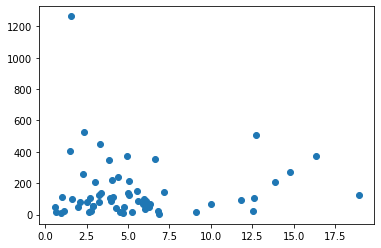

In [12]:
plt.scatter(x, y, marker='o')

pearson correlation of mortality rate with median age

In [13]:
X = med_age_df['mortality rate']
y = med_age_df['median age']
corr, _ = pearsonr(X, y)
corr

0.31144318864382603

We have also provided models with crude mortality rate to identify the behaviour of outcome

                            Total deaths
Crude Mortality Rate                 = ----------------------------------------------------

                    total deaths + total recovered
                    
-----------------------------------------------------

In [14]:
X = wrldmtr_df['crude mortality rate']
y = wrldmtr_df['median age']
corr, _ = pearsonr(X, y)
corr

-0.03137747335576445

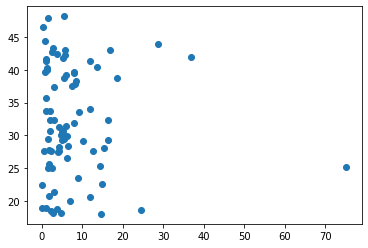

In [15]:
plt.scatter(X, y, marker='o')

Time series plot of the COVID-19 deaths across countries

In [16]:
country_df = prov_df1[prov_df1['country'] == 'australia']
timeseries_df = pd.DataFrame()
timeseries_df['date'] = country_df['date']
timeseries_df['australia_deaths'] = country_df['total deaths']


AUSTRALIA

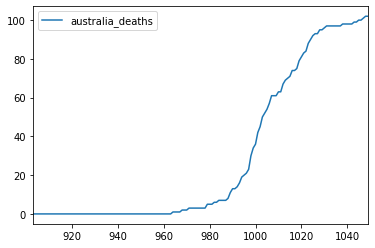

In [17]:
timeseries_df.plot()
plt.show()

TIMESERIES PLOT OF INDIA

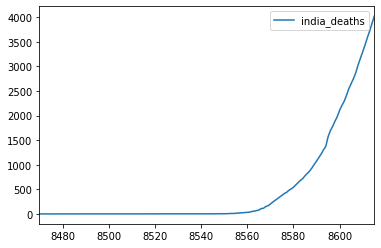

In [18]:
country_df = prov_df1[prov_df1['country'] == 'india']
timeseries_df = pd.DataFrame()
timeseries_df['date'] = country_df['date']
timeseries_df['india_deaths'] = country_df['total deaths']
timeseries_df.plot()
plt.show()

UNITED STATES

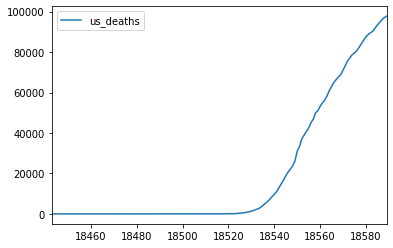

In [19]:
country_df = prov_df1[prov_df1['country'] == 'united states']
timeseries_df = pd.DataFrame()
timeseries_df['date'] = country_df['date']
timeseries_df['us_deaths'] = country_df['total deaths']
timeseries_df.plot()
plt.show()

In [20]:
prov_df_temp= pd.read_excel('temperature_provisional_clean.xlsx')
prov_df_temp

,country,lat,long,date,cases,fatalities,capital,humidity,sunHour,tempC,windspeedKmph,death_rate
0,afghanistan,33.0000,65.0000,1/22/2020,0,0,Kabul,65.0,8.7,-1.0,8.0,0.0
1,afghanistan,33.0000,65.0000,1/23/2020,0,0,Kabul,59.0,8.7,-3.0,8.0,0.0
2,afghanistan,33.0000,65.0000,1/24/2020,0,0,Kabul,71.0,7.1,0.0,7.0,0.0
3,afghanistan,33.0000,65.0000,1/25/2020,0,0,Kabul,79.0,8.7,0.0,7.0,0.0
4,afghanistan,33.0000,65.0000,1/26/2020,0,0,Kabul,64.0,8.7,-1.0,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16672,zambia,-15.4167,28.2833,3/17/2020,0,0,Lusaka,86.0,6.0,24.0,12.0,0.0
16673,zambia,-15.4167,28.2833,3/18/2020,2,0,Lusaka,84.0,8.8,25.0,12.0,0.0
16674,zambia,-15.4167,28.2833,3/19/2020,2,0,Lusaka,86.0,8.8,25.0,10.0,0.0
16675,zambia,-15.4167,28.2833,3/20/2020,2,0,Lusaka,81.0,11.6,25.0,11.0,0.0


In [21]:
coun_wise = prov_df_temp[prov_df_temp['country']=='china']
mulr_afghan = pd.DataFrame()
mulr_afghan['death_rate'] = (coun_wise['fatalities']/coun_wise['cases']) * 100
mulr_afghan['death_rate'] = mulr_afghan['death_rate'].fillna('0')
mulr_afghan['tempC'] = coun_wise['tempC']
mulr_afghan['humidity'] = coun_wise['humidity']


PEARSON CORRELATION OF TEMPERATURE WITH humidity

In [22]:
y = mulr_afghan['tempC']
X = mulr_afghan['humidity']

In [23]:
corr, _ = pearsonr(X, y)
corr

-0.4991296131375892

PEARSON CORRELATION OF TEMPERATURE WITH DEATH_RATE ACROSS ALL COUNTRIES

In [24]:
y = mulr_afghan['tempC']
X = mulr_afghan['death_rate']

In [25]:
corr, _ = pearsonr(X, y)
corr

0.0530984805728683

INDIA

In [26]:
coun_wise = prov_df_temp[prov_df_temp['country']=='india']
mulr_afghan = pd.DataFrame()
mulr_afghan['death_rate'] = (coun_wise['fatalities']/coun_wise['cases']) * 100
mulr_afghan['death_rate'] = mulr_afghan['death_rate'].fillna('0')
mulr_afghan['tempC'] = coun_wise['tempC']
mulr_afghan['humidity'] = coun_wise['humidity']

In [27]:
y = mulr_afghan['tempC'].astype(float)
X = mulr_afghan['death_rate'].astype(float)
corr, _ = pearsonr(X, y)
corr

0.4444100854751278

AUSTRALIA

In [28]:
coun_wise = prov_df_temp[prov_df_temp['country']=='australia']
mulr_afghan = pd.DataFrame()
mulr_afghan['death_rate'] = (coun_wise['fatalities']/coun_wise['cases']) * 100
mulr_afghan['death_rate'] = mulr_afghan['death_rate'].fillna('0')
mulr_afghan['tempC'] = coun_wise['tempC']
mulr_afghan['humidity'] = coun_wise['humidity']
y = mulr_afghan['tempC'].astype(float)
X = mulr_afghan['death_rate'].astype(float)
corr, _ = pearsonr(X, y)
corr

-0.1124443787611141

ISREAL

In [29]:
coun_wise = prov_df_temp[prov_df_temp['country']=='israel']
mulr_afghan = pd.DataFrame()
mulr_afghan['death_rate'] = (coun_wise['fatalities']/coun_wise['cases']) * 100
mulr_afghan['death_rate'] = mulr_afghan['death_rate'].fillna('0')
mulr_afghan['tempC'] = coun_wise['tempC']
mulr_afghan['humidity'] = coun_wise['humidity']
y = mulr_afghan['tempC'].astype(float)
X = mulr_afghan['death_rate'].astype(float)
corr, _ = pearsonr(X, y)
corr

-0.11091931359528753

FRANCE

In [30]:
coun_wise = prov_df_temp[prov_df_temp['country']=='france']
mulr_afghan = pd.DataFrame()
mulr_afghan['death_rate'] = (coun_wise['fatalities']/coun_wise['cases']) * 100
mulr_afghan['death_rate'] = mulr_afghan['death_rate'].fillna('0')
mulr_afghan['tempC'] = coun_wise['tempC']
mulr_afghan['humidity'] = coun_wise['humidity']
y = mulr_afghan['tempC'].astype(float)
X = mulr_afghan['death_rate'].astype(float)
corr, _ = pearsonr(X, y)
corr

0.035854808196399406

SPAIN

In [31]:
coun_wise = prov_df_temp[prov_df_temp['country']=='spain']
mulr_afghan = pd.DataFrame()
mulr_afghan['death_rate'] = (coun_wise['fatalities']/coun_wise['cases']) * 100
mulr_afghan['death_rate'] = mulr_afghan['death_rate'].fillna('0')
mulr_afghan['tempC'] = coun_wise['tempC']
mulr_afghan['humidity'] = coun_wise['humidity']
y = mulr_afghan['tempC'].astype(float)
X = mulr_afghan['death_rate'].astype(float)
corr, _ = pearsonr(X, y)
corr

0.07157016889693849

UNITED KINGDOM

In [32]:
coun_wise = prov_df_temp[prov_df_temp['country']=='uk']
mulr_afghan = pd.DataFrame()
mulr_afghan['death_rate'] = (coun_wise['fatalities']/coun_wise['cases']) * 100
mulr_afghan['death_rate'] = mulr_afghan['death_rate'].fillna('0')
mulr_afghan['tempC'] = coun_wise['tempC']
mulr_afghan['humidity'] = coun_wise['humidity']
y = mulr_afghan['tempC'].astype(float)
X = mulr_afghan['death_rate'].astype(float)
corr, _ = pearsonr(X, y)
corr

0.10713174779854412

SOUTH KOREA

In [33]:
coun_wise = prov_df_temp[prov_df_temp['country']=='korea']
mulr_afghan = pd.DataFrame()
mulr_afghan['death_rate'] = (coun_wise['fatalities']/coun_wise['cases']) * 100
mulr_afghan['death_rate'] = mulr_afghan['death_rate'].fillna('0')
mulr_afghan['tempC'] = coun_wise['tempC']
mulr_afghan['humidity'] = coun_wise['humidity']
y = mulr_afghan['tempC'].astype(float)
X = mulr_afghan['death_rate'].astype(float)
corr, _ = pearsonr(X, y)
corr

0.5732754717112007

JAPAN

In [34]:
coun_wise = prov_df_temp[prov_df_temp['country']=='japan']
mulr_afghan = pd.DataFrame()
mulr_afghan['death_rate'] = (coun_wise['fatalities']/coun_wise['cases']) * 100
mulr_afghan['death_rate'] = mulr_afghan['death_rate'].fillna('0')
mulr_afghan['tempC'] = coun_wise['tempC']
mulr_afghan['humidity'] = coun_wise['humidity']
y = mulr_afghan['tempC'].astype(float)
X = mulr_afghan['death_rate'].astype(float)
corr, _ = pearsonr(X, y)
corr

0.48585407037930245

IRAQ

In [35]:
coun_wise = prov_df_temp[prov_df_temp['country']=='iraq']
mulr_afghan = pd.DataFrame()
mulr_afghan['death_rate'] = (coun_wise['fatalities']/coun_wise['cases']) * 100
mulr_afghan['death_rate'] = mulr_afghan['death_rate'].fillna('0')
mulr_afghan['tempC'] = coun_wise['tempC']
mulr_afghan['humidity'] = coun_wise['humidity']
y = mulr_afghan['tempC'].astype(float)
X = mulr_afghan['death_rate'].astype(float)
corr, _ = pearsonr(X, y)
corr

0.6376659581518395

IRAN

In [36]:
coun_wise = prov_df_temp[prov_df_temp['country']=='iran']
mulr_afghan = pd.DataFrame()
mulr_afghan['death_rate'] = (coun_wise['fatalities']/coun_wise['cases']) * 100
mulr_afghan['death_rate'] = mulr_afghan['death_rate'].fillna('0')
mulr_afghan['tempC'] = coun_wise['tempC']
mulr_afghan['humidity'] = coun_wise['humidity']
y = mulr_afghan['tempC'].astype(float)
X = mulr_afghan['death_rate'].astype(float)
corr, _ = pearsonr(X, y)
corr

0.1271696702671895